# DATA LOAD

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/test.csv')

In [ ]:
train_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


In [ ]:
test_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
0,TEST_0000,192.168.10.243,61955.0,192.168.10.249,55.0,UDP,351.844741,3,3,NaN,...,0.409271,0.719067,NaN,NaN,0,0,0,0,0,NaN
1,TEST_0001,NaN,53118.0,NaN,2094.0,TCP,0.000063,1,1,15887.515152,...,0.000000,0.000000,0.00,0.00,29200,0,1,0,1,NaN
2,TEST_0002,192.168.10.43,NaN,NaN,51.0,UDP,0.060045,2,2,33.308350,...,1299.025647,2231.659444,53.00,53.00,0,0,0,0,0,0.020015
3,TEST_0003,192.168.10.243,62431.0,192.168.10.249,61.0,UDP,NaN,2,2,0.008455,...,0.384714,0.930079,77.75,77.75,0,0,0,0,0,78.846374
4,TEST_0004,NaN,62365.0,192.168.10.249,56.0,UDP,0.095316,1,1,10.491425,...,482.605567,1363.885298,88.00,88.00,0,0,0,0,0,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11999 non-null  object 
 1   ip_src            9487 non-null   object 
 2   port_src          8625 non-null   float64
 3   ip_dst            10695 non-null  object 
 4   port_dst          9712 non-null   float64
 5   protocol          11999 non-null  object 
 6   duration          10925 non-null  float64
 7   pkt_count_fwd     11999 non-null  int64  
 8   pkt_count_bwd     11999 non-null  int64  
 9   rate_fwd_pkts     10828 non-null  float64
 10  rate_bwd_pkts     10312 non-null  float64
 11  rate_fwd_bytes    11999 non-null  float64
 12  rate_bwd_bytes    11999 non-null  float64
 13  payload_fwd_mean  10214 non-null  float64
 14  payload_bwd_mean  10214 non-null  float64
 15  tcp_win_fwd_init  11999 non-null  int64  
 16  tcp_win_bwd_init  11999 non-null  int64 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3000 non-null   object 
 1   ip_src            2363 non-null   object 
 2   port_src          2175 non-null   float64
 3   ip_dst            2655 non-null   object 
 4   port_dst          2438 non-null   float64
 5   protocol          3000 non-null   object 
 6   duration          2725 non-null   float64
 7   pkt_count_fwd     3000 non-null   int64  
 8   pkt_count_bwd     3000 non-null   int64  
 9   rate_fwd_pkts     2672 non-null   float64
 10  rate_bwd_pkts     2588 non-null   float64
 11  rate_fwd_bytes    3000 non-null   float64
 12  rate_bwd_bytes    3000 non-null   float64
 13  payload_fwd_mean  2536 non-null   float64
 14  payload_bwd_mean  2536 non-null   float64
 15  tcp_win_fwd_init  3000 non-null   int64  
 16  tcp_win_bwd_init  3000 non-null   int64  


# 전처리

In [ ]:
train = train_df.copy() ## 데이터 복사
test = test_df.copy()

## payload 결측치 관련 파생변수

In [ ]:
# payload 결측치 플래그
train['payload_bwd_missing_flag'] = train['payload_bwd_mean'].isna().astype(int)
test['payload_bwd_missing_flag'] = test['payload_bwd_mean'].isna().astype(int)

## 결측치 처리

In [ ]:
#=============================================================================
# 포트 변수 변수 => -1
# payload, rate, iat_avg_packets, duration, => 중앙값
#=============================================================================

train['port_src'].fillna(-1, inplace=True) # -1 대체
train['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = train['payload_bwd_mean'].median() # 중앙값 대체
train['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = train['payload_fwd_mean'].median()
train['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = train['iat_avg_packets'].median()
train['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = train['duration'].median()
train['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = train['rate_fwd_pkts'].median()
train['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = train['rate_bwd_pkts'].median()
train['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

In [ ]:
test['port_src'].fillna(-1, inplace=True) # -1 대체
test['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = test['payload_bwd_mean'].median() # 중앙값 대체
test['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = test['payload_fwd_mean'].median()
test['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = test['iat_avg_packets'].median()
test['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = test['duration'].median()
test['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = test['rate_fwd_pkts'].median()
test['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = test['rate_bwd_pkts'].median()
test['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

## 값 기반 범주화 (syn_flag_cat, port_dst_cat)

In [ ]:
#=============================================================================
# tcp_syn_count => 3개로 범주화
# port_dst => 1~2023/이후 상위 5개/나머지
#=============================================================================

def categorize_syn(x):
    if x == 0:
        return 0  # 정상
    elif x in [1, 2]:
        return 1  # 약간의 SYN 요청
    else:
        return 2  # SYN Flooding 가능성

train['syn_flag_cat'] = train['tcp_syn_count'].apply(categorize_syn)
test['syn_flag_cat'] = test['tcp_syn_count'].apply(categorize_syn)

In [ ]:
# port_dst>1023 데이터 중 상위 5개 포트 추출
dst_port_high = train[train['port_dst'] > 1023]['port_dst']
top5_ports = dst_port_high.value_counts().nlargest(5).index

def categorize_port_dst(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

train['port_dst_cat'] = train['port_dst'].apply(categorize_port_dst)

In [ ]:
dst_port_high_test = test[test['port_dst'] > 1023]['port_dst']
top5_ports_test = dst_port_high_test.value_counts().nlargest(5).index

def categorize_port_dst_test(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports_test:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

test['port_dst_cat'] = test['port_dst'].apply(categorize_port_dst_test)

## 추가 파생변수

In [ ]:
# PSH 유무: tcp_psh_count > 0 → 1, else → 0
train['has_psh_flag'] = (train['tcp_psh_count'] > 0).astype(int)
test['has_psh_flag'] = (test['tcp_psh_count'] > 0).astype(int)

# 초당 패킷 전송 비율 = rate_fwd_pkts / rate_bwd_pkts
train['rate_pkts_ratio'] = train['rate_fwd_pkts'] / (train['rate_bwd_pkts'] + 1e-5) # 0으로 나누는 것 방지
test['rate_pkts_ratio'] = test['rate_fwd_pkts'] / (test['rate_bwd_pkts'] + 1e-5)

# 송수신 패킷 비율 = pkt_count_fwd / pkt_count_bwd
train['pkt_count_ratio'] = train['pkt_count_fwd'] / (train['pkt_count_bwd'] + 1e-5)
test['pkt_count_ratio'] = test['pkt_count_fwd'] / (test['pkt_count_bwd'] + 1e-5)

# 패킷 간 평균 시간 간격 이진 파생변수: iat_avg_packets <= 1 → 1, else → 0
train['is_iat_low'] = (train['iat_avg_packets'] <= 1.0).astype(int)
test['is_iat_low'] = (test['iat_avg_packets'] <= 1.0).astype(int)

train.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True) ## 불필요한 기존변수삭제
test.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True)

## 변수 삭제

In [ ]:
#=============================================================================
# ID, ip_scr, ip_dst, port_src
# payload_fwd_mean (bwd와 겹치는 칼럼)
#=============================================================================

train.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)
test.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)

## 로그변환

In [ ]:
import numpy as np

log_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio' # 파생변수 포함
]

for col in log_cols:
    train[col] = np.log1p(train[col])

for col in log_cols:
    test[col] = np.log1p(test[col])

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio'
]

# 스케일러 객체 생성
scaler = StandardScaler()

# 스케일링 적용
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

## LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
le_protocol = LabelEncoder()
le_postdst = LabelEncoder()
le_attack = LabelEncoder()

le_protocol.fit(pd.concat([train['protocol'], test['protocol']], axis=0).astype(str).unique())
le_postdst.fit(pd.concat([train['port_dst_cat'], test['port_dst_cat']], axis=0).astype(str).unique())

train['protocol'] = le_protocol.transform(train['protocol'].astype(str))
train['port_dst_cat'] = le_postdst.transform(train['port_dst_cat'].astype(str))
train['attack_type'] = le_attack.fit_transform(train['attack_type']) # attack_type is only in train

test['protocol'] = le_protocol.transform(test['protocol'].astype(str))
test['port_dst_cat'] = le_postdst.transform(test['port_dst_cat'].astype(str))

# 모델 선정 + 학습 및 예측

#**MLP**

###**MLP - test_size = 0.2**

**필요 패키지 로딩**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

**train, test 분리**

In [ ]:
X = train.drop('attack_type', axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=156)

**SMOTE 계산**

In [ ]:
smote = SMOTE(k_neighbors=3, random_state=156)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**모델 학습**

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=200, random_state=156)
mlp_model.fit(X_train_smote, y_train_smote)

MLPClassifier(random_state=156)

**Macro F1 Score 성능평가**

In [ ]:
y_pred = mlp_model.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1758
           1       0.57      0.80      0.67         5
           2       0.93      1.00      0.96        94
           3       0.29      0.70      0.41        10
           4       0.57      0.50      0.53         8
           5       0.86      0.93      0.89       344
           6       0.94      0.99      0.96       159
           7       0.12      0.83      0.21         6
           8       0.11      0.43      0.17         7
           9       1.00      0.40      0.57         5
          10       0.06      0.67      0.11         3
          11       0.00      0.00      0.00         1

    accuracy                           0.91      2400
   macro avg       0.54      0.68      0.54      2400
weighted avg       0.96      0.91      0.93      2400

Macro F1 Score: 0.5364949086232008


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = mlp_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_mlp_0.2.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_mlp_0.2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Permutation Importance 시각화**
- 검증 데이터에서 각 피처의 값을 무작위로 섞어 모델 성능 저하를 측정하여 중요도를 추정하는 방법

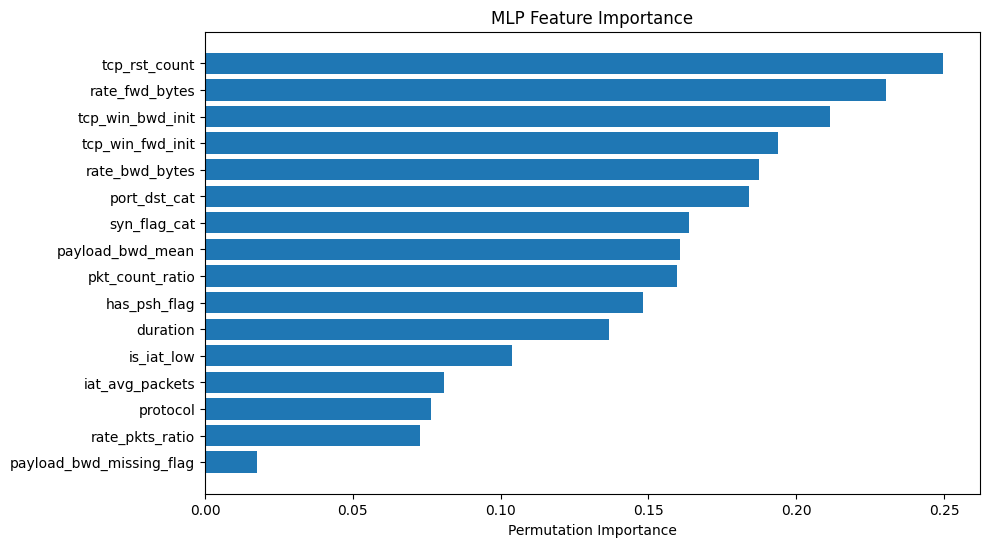

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(mlp_model, X_val, y_val, n_repeats=10, random_state=156, scoring='f1_macro')

sorted_idx = result.importances_mean.argsort()[::-1]
feature_names = X_val.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('MLP Feature Importance')
plt.gca().invert_yaxis()
plt.show()

###**MLP - test_size = 0.3**

**필요 패키지 로딩**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

**train, test 분리**

In [ ]:
X = train.drop('attack_type', axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=156)

**SMOTE 계산**

In [ ]:
smote = SMOTE(k_neighbors=3, random_state=156)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**모델 학습**

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=200, random_state=156)
mlp_model.fit(X_train_smote, y_train_smote)

MLPClassifier(random_state=156)

**Macro F1 Score 성능평가**

In [ ]:
y_pred = mlp_model.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Macro F1 Score:", f1_score(y_val, y_pred, average='macro'))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2638
           1       1.00      0.88      0.93         8
           2       0.93      0.98      0.96       141
           3       0.35      0.79      0.49        14
           4       0.21      0.25      0.23        12
           5       0.84      0.98      0.90       516
           6       0.95      0.97      0.96       238
           7       0.12      0.67      0.20         9
           8       0.30      0.30      0.30        10
           9       0.50      0.38      0.43         8
          10       0.04      0.50      0.07         4
          11       0.00      0.00      0.00         2

    accuracy                           0.91      3600
   macro avg       0.52      0.63      0.53      3600
weighted avg       0.95      0.91      0.93      3600

Macro F1 Score: 0.5341543548529785


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = mlp_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_mlp_0.3.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_mlp_0.3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Permutation Importance 시각화**


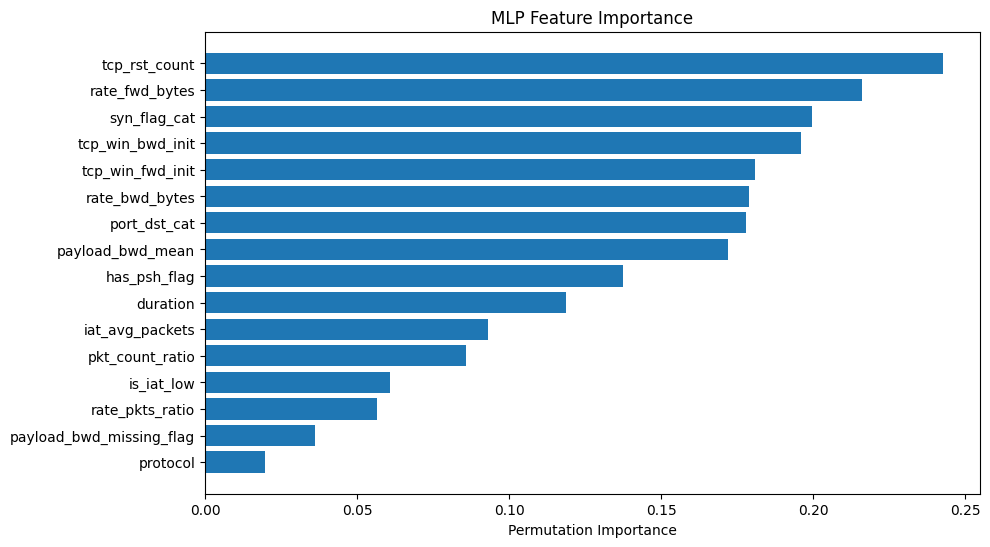

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(mlp_model, X_val, y_val, n_repeats=10, random_state=156, scoring='f1_macro')

sorted_idx = result.importances_mean.argsort()[::-1]
feature_names = X_val.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('MLP Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#**SVC**

###**SVC - test_size = 0.2**

**필요 패키지 로딩**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

**train, test 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=156, stratify=y
)

**모델 학습**

In [ ]:
svc_model = SVC(kernel='rbf', class_weight='balanced', random_state=156)

svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=156)

**예측 및 Macro F1 Score 성능평가**

In [ ]:
y_pred = svc_model.predict(X_val)

print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9972    0.5973    0.7471      1758
           1     0.0120    0.8000    0.0237         5
           2     0.2634    0.7340    0.3876        94
           3     0.2400    0.6000    0.3429        10
           4     0.0000    0.0000    0.0000         8
           5     0.0000    0.0000    0.0000       344
           6     0.0000    0.0000    0.0000       159
           7     0.0041    0.3333    0.0081         6
           8     0.0000    0.0000    0.0000         7
           9     0.0000    0.0000    0.0000         5
          10     0.0101    0.3333    0.0196         3
          11     0.0000    0.0000    0.0000         1

    accuracy                         0.4717      2400
   macro avg     0.1272    0.2832    0.1274      2400
weighted avg     0.7418    0.4717    0.5639      2400

Macro F1 Score: 0.1274


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = svc_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
if len(test_pred.shape) > 1:
    test_pred = test_pred.ravel()

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_svc_0.2.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_svc_0.2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Permutation Importance 시각화**
- 여기서 사용하기 위해선 eli5 패키지를 설치해서 시각화 수행 가능 (너무 오래걸림)

###**Linear SVC + 정규화 수행**
- 고차원에 더욱 적합한 SVC model

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced', random_state=156, max_iter=10000)
svc.fit(X_train, y_train)

LinearSVC(class_weight='balanced', max_iter=10000, random_state=156)

**예측 및 Macro F1 Score 성능평가**

In [ ]:
y_pred = svc.predict(X_val)

print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9706    0.8623    0.9133      1758
           1     0.2000    0.4000    0.2667         5
           2     0.8762    0.9787    0.9246        94
           3     0.0896    0.6000    0.1558        10
           4     0.0000    0.0000    0.0000         8
           5     0.6780    0.8140    0.7398       344
           6     0.9181    0.9874    0.9515       159
           7     0.0000    0.0000    0.0000         6
           8     0.1667    0.4286    0.2400         7
           9     0.2500    0.4000    0.3077         5
          10     0.0588    0.3333    0.1000         3
          11     0.0000    0.0000    0.0000         1

    accuracy                         0.8579      2400
   macro avg     0.3507    0.4837    0.3833      2400
weighted avg     0.9051    0.8579    0.8769      2400

Macro F1 Score: 0.3833


###**SVC - test_size = 0.3**

**필요 패키지 로딩**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

**train, test 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=156, stratify=y
)

**모델 학습**

In [ ]:
svc_model = SVC(kernel='rbf', class_weight='balanced', random_state=156)

svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=156)

**예측 및 Macro F1 Score 성능평가**

In [ ]:
y_pred = svc_model.predict(X_val)

print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9968    0.5830    0.7357      2638
           1     0.0136    0.8750    0.0269         8
           2     0.2440    0.7943    0.3733       141
           3     0.2353    0.5714    0.3333        14
           4     0.0029    0.1667    0.0056        12
           5     1.0000    0.0136    0.0268       516
           6     1.0000    0.0042    0.0084       238
           7     0.1250    0.1111    0.1176         9
           8     0.0000    0.0000    0.0000        10
           9     0.0000    0.0000    0.0000         8
          10     0.0117    0.5000    0.0229         4
          11     0.0064    0.5000    0.0126         2

    accuracy                         0.4664      3600
   macro avg     0.3030    0.3433    0.1386      3600
weighted avg     0.9507    0.4664    0.5598      3600

Macro F1 Score: 0.1386


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = svc_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
if len(test_pred.shape) > 1:
    test_pred = test_pred.ravel()

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_svc_0.3.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_svc_0.3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**KNN**

###**KNN - test_size = 0.2**

**필요 패키지 로딩**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**train, test 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=156
)

**SMOTE 계산**

In [ ]:
smote = SMOTE(k_neighbors=3, random_state=156)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**모델 학습**
- 거리기반 가중치 부여

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(weights='distance')

**예측 및 Macro F1 Score 성능평가**

In [ ]:
y_pred = knn_model.predict(X_val)

print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9876    0.9505    0.9687      1758
           1     0.4444    0.8000    0.5714         5
           2     0.9208    0.9894    0.9538        94
           3     0.5833    0.7000    0.6364        10
           4     0.1154    0.3750    0.1765         8
           5     0.9114    0.9564    0.9333       344
           6     0.9682    0.9560    0.9620       159
           7     0.5000    0.6667    0.5714         6
           8     0.2000    0.2857    0.2353         7
           9     0.0000    0.0000    0.0000         5
          10     0.1111    0.6667    0.1905         3
          11     0.0000    0.0000    0.0000         1

    accuracy                         0.9446      2400
   macro avg     0.4785    0.6122    0.5166      2400
weighted avg     0.9600    0.9446    0.9512      2400

Macro F1 Score: 0.5166


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = knn_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_knn_0.2.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_knn_0.2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Confusion Matrix 시각화**


In [ ]:
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1758
           1       0.44      0.80      0.57         5
           2       0.92      0.99      0.95        94
           3       0.58      0.70      0.64        10
           4       0.12      0.38      0.18         8
           5       0.91      0.96      0.93       344
           6       0.97      0.96      0.96       159
           7       0.50      0.67      0.57         6
           8       0.20      0.29      0.24         7
           9       0.00      0.00      0.00         5
          10       0.11      0.67      0.19         3
          11       0.00      0.00      0.00         1

    accuracy                           0.94      2400
   macro avg       0.48      0.61      0.52      2400
weighted avg       0.96      0.94      0.95      2400



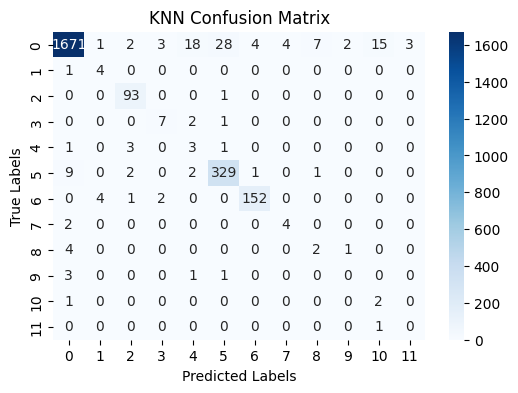

In [ ]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix')
plt.show()

###**KNN - test_size = 0.3**

**필요 패키지 로딩**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**train, test 분리**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=156
)

**SMOTE 계산**

In [ ]:
smote = SMOTE(k_neighbors=3, random_state=156)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**모델 학습**
- 거리기반 가중치 부여

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(weights='distance')

**예측 및 Macro F1 Score 성능평가**

In [ ]:
y_pred = knn_model.predict(X_val)

print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0     0.9912    0.9439    0.9670      2638
           1     0.3889    0.8750    0.5385         8
           2     0.9139    0.9787    0.9452       141
           3     0.5500    0.7857    0.6471        14
           4     0.1064    0.4167    0.1695        12
           5     0.8943    0.9671    0.9292       516
           6     0.9573    0.9412    0.9492       238
           7     0.5455    0.6667    0.6000         9
           8     0.2143    0.3000    0.2500        10
           9     0.2500    0.3750    0.3000         8
          10     0.1250    0.5000    0.2000         4
          11     0.0000    0.0000    0.0000         2

    accuracy                         0.9411      3600
   macro avg     0.4947    0.6458    0.5413      3600
weighted avg     0.9596    0.9411    0.9489      3600

Macro F1 Score: 0.5413


**test 데이터로 모델 학습 및 예측**

In [ ]:
test_pred = knn_model.predict(test)

**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_knn_0.3.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_knn_0.3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Confusion Matrix 시각화**


In [ ]:
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      2638
           1       0.39      0.88      0.54         8
           2       0.91      0.98      0.95       141
           3       0.55      0.79      0.65        14
           4       0.11      0.42      0.17        12
           5       0.89      0.97      0.93       516
           6       0.96      0.94      0.95       238
           7       0.55      0.67      0.60         9
           8       0.21      0.30      0.25        10
           9       0.25      0.38      0.30         8
          10       0.12      0.50      0.20         4
          11       0.00      0.00      0.00         2

    accuracy                           0.94      3600
   macro avg       0.49      0.65      0.54      3600
weighted avg       0.96      0.94      0.95      3600



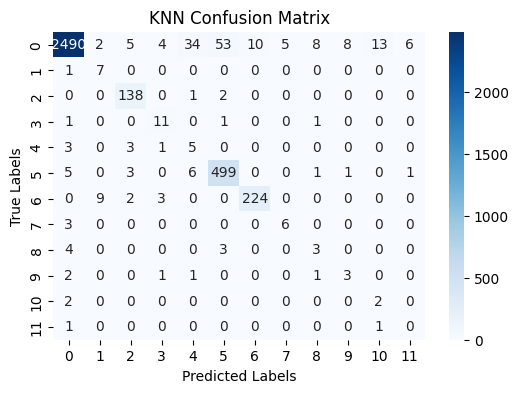

In [ ]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix')
plt.show()